## Homework 2

Question 1:

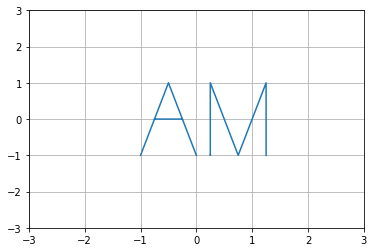

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive,interact
from IPython.display import display

vert=np.array([[-1,-1],[-0.5,1],[0,-1],[-.001,-1],[-.75,-.001],
               [-0.75,0],[-0.25,0],[-0.25,0.001],[0.25,-.999],
               [0.25,-1],[0.25,1],[.75,-1],[1.25,1],[1.25,-1]])

vert[3:4]=np.nan
vert[7:8]=np.nan

plt.xlim(-3,3)
plt.ylim(-3,3)
plt.grid()
plt.plot(vert[:,0],vert[:,1])
#plt.axis('square')

In [2]:
def transpose(x,y):
    new_vert=vert+[x,y]
    return new_vert

def rotate(new_vert,angle):
    angle_to_rad=angle*np.pi/180
    c=np.cos(angle_to_rad)
    s=np.sin(angle_to_rad)
    R=np.array([[c,-s],
            [s,c]])
    center_of_rot=new_vert[0]
    rotated=[np.dot(R,ver) for ver in new_vert-center_of_rot]+center_of_rot
    return rotated
    
def plot(t_x=1,t_y=1,a=0):
    plt.xlim(-3,3)
    plt.ylim(-3,3)
    plt.grid()
    new_vert1=rotate(transpose(t_x,t_y),a)
    plt.plot(new_vert1[:,0],new_vert1[:,1])

v=interact(plot, t_x=(-3.,3.,0.1),t_y=(-3.,3.,0.1), a=(0, 360, 1))


interactive(children=(FloatSlider(value=1.0, description='t_x', max=3.0, min=-3.0), FloatSlider(value=1.0, description='t_y', max=3.0, min=-3.0), IntSlider(value=0, description='a', max=360), Output()), _dom_classes=('widget-interact',))

Question 2:

Text(0.5,1,'Initial Maximum')

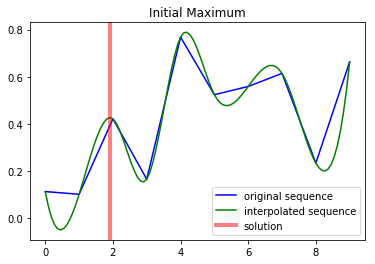

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy import optimize

N=10
N_i=100

x1 = np.arange(0.0, N)
y1 = np.random.uniform(0,1,N) # Generate random numbers

interp_fun = interp1d(x1, y1,kind='cubic') # Interpolate the sequence

xnew = np.linspace(0, 9, num=N_i)

def f(xnew):
    return -interp_fun(xnew) 

result=optimize.minimize(f, 2,method='L-BFGS-B',bounds=[(0.000001,8.99999)]) # Find local maxima 

plt.plot(x1,y1,'b',label='original sequence')
plt.plot(xnew,interp_fun(xnew),'g',label='interpolated sequence')
#plt.bar(result.x, 1, width=0.1,color=['red'],alpha=0.5,label='solution')
plt.axvline(result.x,color='r',alpha=0.5,linewidth=4,label='solution')
plt.legend(loc='best')
plt.title('Initial Maximum')
#plt.xlim(0,9)
#plt.ylim(0,1)

To find the global maxima, first all the critical points of the function are found. Then the interpolated function is evaluated at all the critical points and the end points of the function. The point that results in the maximum value of the evaluated function is the global maxima.

To find the critical points we need to find the derivative of the function and equate it to zero. The UnivariateSpline function can give the derivative of the spline. Here an order 4 spline is fit, as roots function works only for order 3 splines. So in order to get the global maxima of the previous cubic spline fit, the maxima found by the above method was given as an initial guess to the optimize.minimize function.

Text(0.5,1,'Global Maximum')

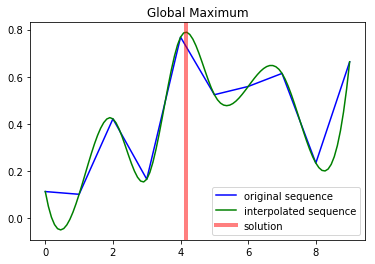

In [6]:
from scipy.interpolate import UnivariateSpline
spl = UnivariateSpline(x1, y1, k=4, s=0)
critical=spl.derivative().roots() 
critical=np.append(critical,[min(x1),max(x1)])
global_max=critical[np.argmax(interp_fun(critical))]

result=optimize.minimize(f, global_max,method='L-BFGS-B',bounds=[(0.000001,8.99999)])

plt.plot(x1,y1,'b',label='original sequence')
plt.plot(xnew,interp_fun(xnew),'g',label='interpolated sequence')
#plt.bar(result.x, 1, width=0.1,color=['red'],alpha=0.5,label='solution')
plt.axvline(result.x,color='r',alpha=0.5,linewidth=4,label='solution')
plt.legend(loc='best')
plt.title('Global Maximum')
#plt.xlim(0,9)
#plt.ylim(0,1)